## 1. Problem Presentation

### 1.1 Problem Statement

According to the CDC about 610,000 people die of heart disease in the United States every year. Early detection can play a major role in prevention in order to save lives. Hopefully this data set can shed some light onto key indicators.

### 1.2 Introducing the Data

In this final project I will use the Statlog (Heart) Data Set from the UCI Machine Learning Repository containing information on heart disease and 13 attributes that will help me predict whether or not an individual has a heart disease. The data set, as well as a document with information about the data, can be found in the 'data' folder of this repository.

In the real world a model could be built off of similar (but more extensive) data to predict whether or not an individual has, or is at risk of developing, a heart disease. Or at least it could be used to find which of the included attributes are key indicators of heart disease.

The main limitation I encountered in this project is the somewhat small size of the data set I am analyzing. When trying to predict something as serious as heart disease in the real world, you want to be sure to have an ample amount of data to ensure your model is as accurate as possible.

### 1.3 Target Variable

The target variable in this data set is the 'Disease_Presence' column which indicates 1 (the absence) or 2 (the presence) of heart disease in a patient. Since this column is classifying data into one of two binary groups, I will use classification modeling to analyze and evaluate this data set.

### 1.4 Feature Variables

The feature columns include age, sex, chest pain type, resting blood pressure, serum cholestoral in mg/dl, fasting blood sugar > 120 mg/dl, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flourosopy, and thal. Some of these names have been shortened/abbreviated in the Data Frame for simplicity sake.

## 2. Data Preparation

### 2.1 Importing Necessary Libraries and Data

In [10]:
#Importing libraries I may need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
#Here I define the column names as given to me in 'data/heart.doc'
colnames=['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fasting_bs', 'resting_ecg', 'max_hr', 'exercise_angina', 'oldpeak', 'slope_of_ST segment', '#_of_major_vessels', 'thal', 'Disease_Presence']
#Load in the data and assign the column names
heart = pd.read_csv('data/heart.dat', delimiter=' ', index_col=False, names=colnames)
#Print the number of rows and columns in the data set
print (heart.shape)
#View a sample of the data to make sure it has loaded correctly
heart.sample(5)

(270, 14)


,age,sex,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,slope_of_ST segment,#_of_major_vessels,thal,Disease_Presence
179,50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,1
224,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,1
108,59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0,2
62,44.0,1.0,3.0,120.0,226.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,1
142,50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.0,7.0,2


### 2.2 Data Cleanup

In [12]:
#Checking for missing values
heart.isna().sum()

age                    0
sex                    0
chest_pain             0
resting_bp             0
cholesterol            0
fasting_bs             0
resting_ecg            0
max_hr                 0
exercise_angina        0
oldpeak                0
slope_of_ST segment    0
#_of_major_vessels     0
thal                   0
Disease_Presence       0
dtype: int64

Since there are no missing values, I can continue with the full set of data

In [13]:
#Find descriptive statistics of the data set
heart.describe()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,slope_of_ST segment,#_of_major_vessels,thal,Disease_Presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


## 3. Data Analysis

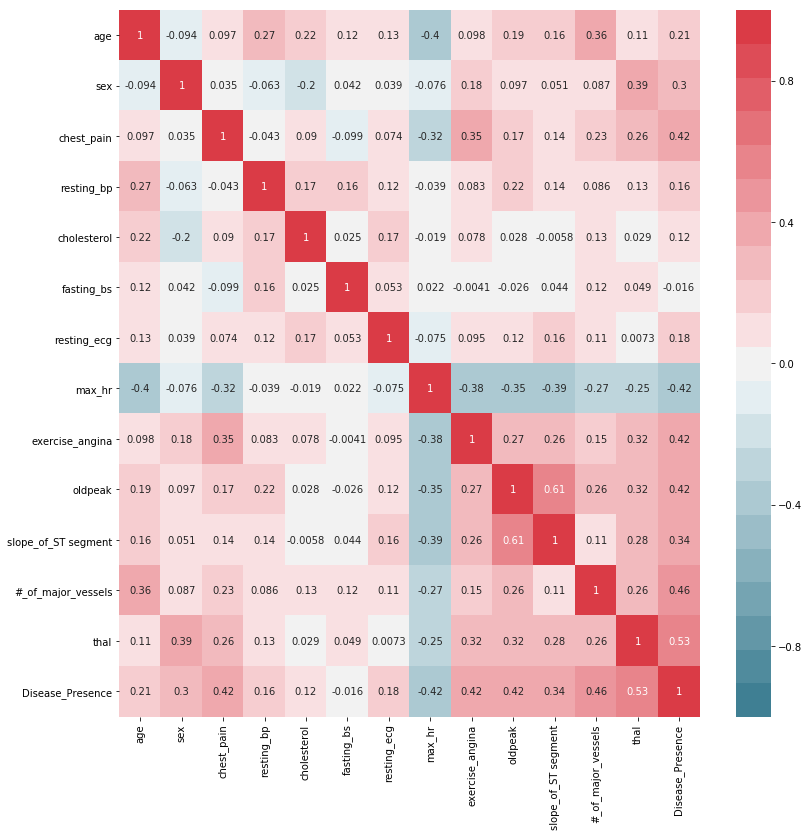

In [14]:
#Checking correlation of columns
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(heart.corr(),
            vmin = -1,
            vmax = 1,
            cmap = sns.diverging_palette(220,10, n=21),
            annot=True,
            ax = ax
            );

## 4. Modeling

In [15]:
#Creating a feature matrix DataFrame and target vector series
target_col = 'Disease_Presence'
X = heart.drop(target_col, axis='columns')
y = heart.loc[:, target_col]

In [16]:
# Do train/test split on feature and target columns
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [17]:
#Initialize a random forest classifier
rfc = RandomForestClassifier(n_estimators=50)
#Fit the training set
rfc.fit(X_train, y_train)
#Score the training and test sets
print ('train', rfc.score(X_train, y_train))
print ('test', rfc.score(X_test, y_test))

train 1.0
test 0.8676470588235294


I am seeing scores of .98-1.0 on my training set and scores ranging from .83-.88 on my testing set

In [18]:
feat_names=['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fasting_bs', 'resting_ecg', 'max_hr', 'exercise_angina', 'oldpeak',
            'slope_of_ST segment', '#_of_major_vessels', 'thal']

pd.DataFrame({'feature': feat_names, 'importance': rfc.feature_importances_})

,feature,importance
0,age,0.078309
1,sex,0.039601
2,chest_pain,0.115436
3,resting_bp,0.085989
4,cholesterol,0.089663
5,fasting_bs,0.008892
6,resting_ecg,0.025041
7,max_hr,0.124310
8,exercise_angina,0.043680
9,oldpeak,0.101403


Some of the most important features include thal, max_hr, chest_pain. However in testing I discovered that dropping any least important features did not have much of an impact on my model

## 5. Evaluation

### 5.1 Null Model

In [19]:
#Null model to compare my model against
heart.loc[:, target_col].value_counts(normalize=True)

1    0.555556
2    0.444444
Name: Disease_Presence, dtype: float64

Assuming we were to just assume the absence of heart disease for every patient in this study, we would be correct about 55% of the time

### 5.2 Bias and Variance

Since my model is performing far better than the null model, it shows that there is a small bias problem. However, there is likely a variance and overfitting problem since the training set is performing better than the test set.

### 5.3 Closing Statement

Overall my model is performing pretty well and it is a good start for predicting the absence or presence of heart disease. In order to improve this model I would suggest attempting to collect more data.